# **Chess Apriori-**

Group Members:
1. Mohammd Nurul Abrar (2018-1-60-0139)
2.Md Maruf (2018-1-60-140)


In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=86c190371d75a551892e44300a7b4461e4b24b4b7262be4f5f5e35ebd24a5dcb
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from apyori import apriori
import time

In [4]:

chessdata= pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/477project/Chess.csv", header = None) 
chessdata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72,74
1,1,3,5,7,9,12,13,15,17,19,21,23,25,27,29,31,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72,74
2,1,3,5,7,9,12,13,16,17,19,21,23,25,27,29,31,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72,74
3,1,3,5,7,9,11,13,15,17,20,21,23,25,27,29,31,34,36,38,40,42,44,47,48,50,52,54,56,58,60,62,64,66,68,70,72,74
4,1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,34,36,38,40,42,44,46,48,51,52,54,56,58,60,62,64,66,68,70,72,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,2,4,5,7,9,11,13,16,17,19,21,23,26,27,29,33,34,36,38,40,42,44,46,49,51,52,54,56,58,61,62,64,67,68,70,73,74
3192,2,4,5,7,9,11,13,16,17,19,21,23,26,27,29,33,34,36,38,40,42,44,46,49,50,52,54,56,58,61,62,64,67,68,70,73,74
3193,2,4,5,7,9,11,13,16,17,19,21,23,26,27,29,31,34,36,38,40,42,44,46,49,50,52,54,56,58,61,62,64,67,68,70,73,74
3194,2,4,5,8,9,11,13,16,17,19,21,23,26,27,30,33,35,36,38,40,42,44,46,48,51,52,54,56,58,61,62,64,67,68,71,73,74


In [5]:
#manually add the column name which should be convert from category to numeric
Cat = []

for column in Cat:
    col_name = column + '_cat'
    df[col_name] = df[column].astype('category').cat.codes
    df=df.drop([column], axis=1)

In [6]:
chessdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3196 non-null   int64
 1   1       3196 non-null   int64
 2   2       3196 non-null   int64
 3   3       3196 non-null   int64
 4   4       3196 non-null   int64
 5   5       3196 non-null   int64
 6   6       3196 non-null   int64
 7   7       3196 non-null   int64
 8   8       3196 non-null   int64
 9   9       3196 non-null   int64
 10  10      3196 non-null   int64
 11  11      3196 non-null   int64
 12  12      3196 non-null   int64
 13  13      3196 non-null   int64
 14  14      3196 non-null   int64
 15  15      3196 non-null   int64
 16  16      3196 non-null   int64
 17  17      3196 non-null   int64
 18  18      3196 non-null   int64
 19  19      3196 non-null   int64
 20  20      3196 non-null   int64
 21  21      3196 non-null   int64
 22  22      3196 non-null   int64
 23  23      3196 

In [7]:
chessdata.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
dtype: int64

In [8]:
rowlength = len(chessdata)
no_features = len(chessdata.values[0])

In [9]:
chessrecords = []
for i in range(0, rowlength):
    chessrecords.append([int(chessdata.values[i,j]) for j in range(0, no_features)if int(chessdata.values[i,j]) != 0])
    #removing 0

In [10]:
cthreshold = 1
chess_time = []
cthreshold_value = []


for i in range(0,3):
  start = time.time()
  rules = apriori(chessrecords,min_support=cthreshold)
  output = list(rules)
  end = time.time()
  chess_time.append(end-start)
  cthreshold_value.append(cthreshold)
  cthreshold = cthreshold - 0.1

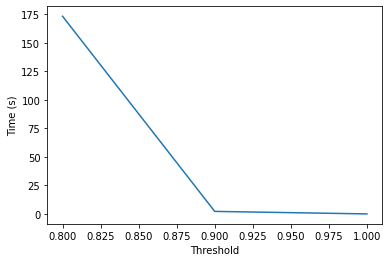

In [11]:
from matplotlib import pyplot as plt

plt.plot( cthreshold_value ,chess_time, label='chess dataset')
plt.xlabel("Threshold")
plt.ylabel("Time (s)")
plt.savefig("Chess_apriori.jpg")

Chess Dataset Analysis

In [12]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 25.9 MB 142 kB/s
     |████████████████████████████████| 10.1 MB 5.2 MB/s 
     |████████████████████████████████| 596 kB 41.5 MB/s 
     |████████████████████████████████| 102 kB 11.4 MB/s 
     |████████████████████████████████| 675 kB 43.1 MB/s 
     |████████████████████████████████| 4.7 MB 39.4 MB/s 
     |████████████████████████████████| 62 kB 772 kB/s 
     |████████████████████████████████| 812 kB 46.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=9791205c0ede369a18bc2e12a573184a113306b8aa271ebb6417b5ccb60fb6e7
  Stored in directory: /tmp/pip-ephem-wheel-cache-rlg8sv1g/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=ab2e3279c6a2827f0e53fd3d39a13b891bb4749a767f3d3c78bc9bbb843ebbae
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14

In [13]:
data=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/477project/Chess.csv")

In [14]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

df = pd.DataFrame(np.random.rand(100, 5), columns=["a", "b", "c", "d", "e"])

In [15]:
!pip install pandas-profiling

In [16]:
import numpy as np
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
pro=pandas_profiling.ProfileReport(data)

pro


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
pro.to_file("chessanalysis.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]